In [285]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch.nn.functional import mse_loss
from torch_geometric.datasets import Planetoid
from tqdm.notebook import tqdm
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import radius_neighbors_graph

In [286]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy
import pickle

In [287]:
def l2(a,b):
    return torch.sqrt((a[0] - b[0])**2  + (a[1] - b[1])**2)

def l1(a,b):
    return torch.abs(a[0] - b[0]) + torch.abs(a[1] - b[1])
def generate_points(n):
    V = torch.rand([n,2])
    return V
def get_l1_dist(V):
    dist =  torch.tensor([ [l1(x,y)  for x in V] for y in V ])
    return dist
def get_l2_dist(V):
    dist =  torch.tensor([ [l2(x,y)  for x in V] for y in V ])
    return dist

In [288]:
import pygsp as pg
from pygsp import graphs, filters, plotting

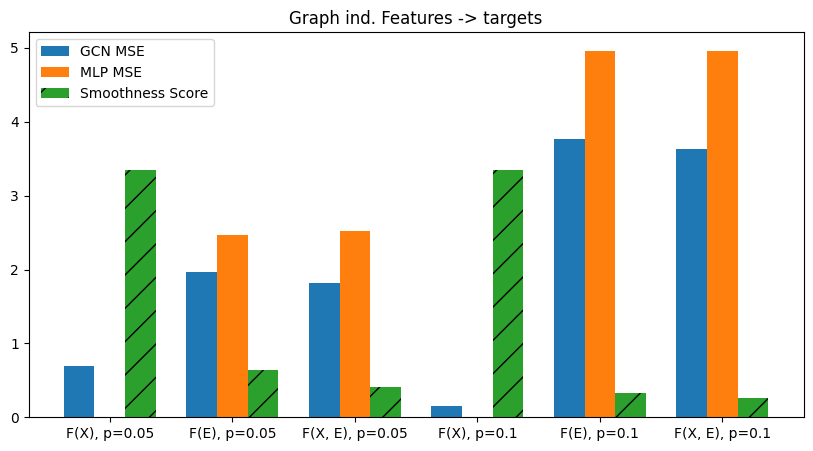

In [289]:
plt.figure(figsize=(10, 5))
performance_gcn = [0.699, 1.973, 1.818, 0.148, 3.762, 3.633]
performance_mlp = [0.002, 2.461, 2.524, 0.002, 4.963, 4.963]
smooth = [3.345, 0.639, 0.407, 3.345, 0.334, 0.267]
barWidth = 0.25
br1 = np.arange(len(performance_gcn)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
plt.title("Graph ind. Features -> targets")
plt.bar(br1, performance_gcn, width=barWidth)
plt.bar(br2, performance_mlp, width=barWidth)
plt.bar(br3, smooth, hatch="/", width=barWidth)
plt.xticks([r + barWidth for r in range(len(performance_gcn))], ['F(X), p=0.05', 'F(E), p=0.05', 'F(X, E), p=0.05', 'F(X), p=0.1', 'F(E), p=0.1', 'F(X, E), p=0.1'])
plt.legend(['GCN MSE', 'MLP MSE', 'Smoothness Score'])

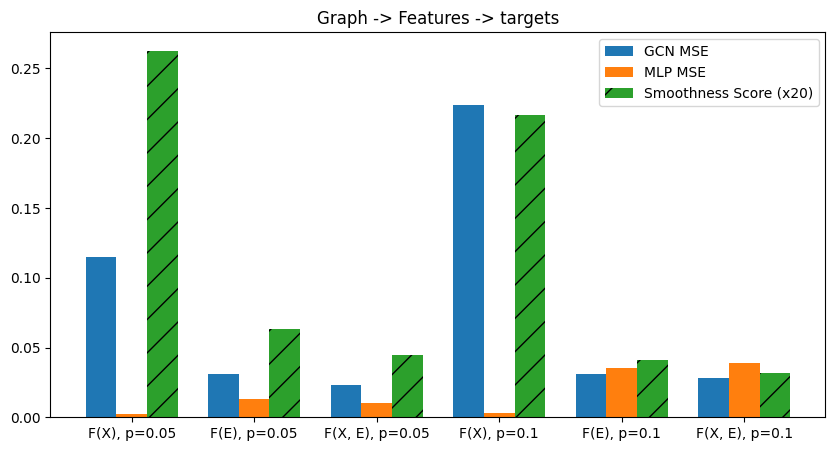

In [290]:
plt.figure(figsize=(10, 5))
performance_gcn = [0.115, 0.031, 0.023, 0.224, 0.031, 0.028]
performance_mlp = [0.002, 0.013, 0.010, 0.003, 0.035, 0.039]
smooth = np.array([5.255, 1.272, 0.891, 4.338, 0.819, 0.628])/20
barWidth = 0.25
br1 = np.arange(len(performance_gcn)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
plt.title("Graph -> Features -> targets")
plt.bar(br1, performance_gcn, width=barWidth)
plt.bar(br2, performance_mlp, width=barWidth)
plt.bar(br3, smooth, hatch="/", width=barWidth)
plt.xticks([r + barWidth for r in range(len(performance_gcn))], ['F(X), p=0.05', 'F(E), p=0.05', 'F(X, E), p=0.05', 'F(X), p=0.1', 'F(E), p=0.1', 'F(X, E), p=0.1'])
plt.legend(['GCN MSE', 'MLP MSE', 'Smoothness Score (x20)'])

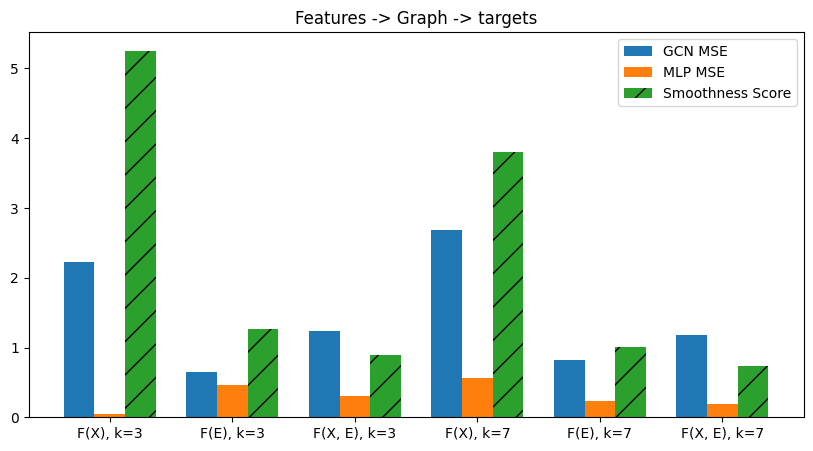

In [201]:
plt.figure(figsize=(10, 5))
performance_gcn = [2.223, 0.643, 1.241, 2.683, 0.816, 1.185]
performance_mlp = [0.048, 0.461, 0.300, 0.560, 0.235, 0.194]
smooth = np.array([5.255, 1.272, 0.891, 3.809, 1.009, 0.730])
barWidth = 0.25
br1 = np.arange(len(performance_gcn)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
plt.title("Features -> Graph -> targets")
plt.bar(br1, performance_gcn, width=barWidth)
plt.bar(br2, performance_mlp, width=barWidth)
plt.bar(br3, smooth, hatch="/", width=barWidth)
plt.xticks([r + barWidth for r in range(len(performance_gcn))], ['F(X), k=3', 'F(E), k=3', 'F(X, E), k=3', 'F(X), k=7', 'F(E), k=7', 'F(X, E), k=7'])
plt.legend(['GCN MSE', 'MLP MSE', 'Smoothness Score'])

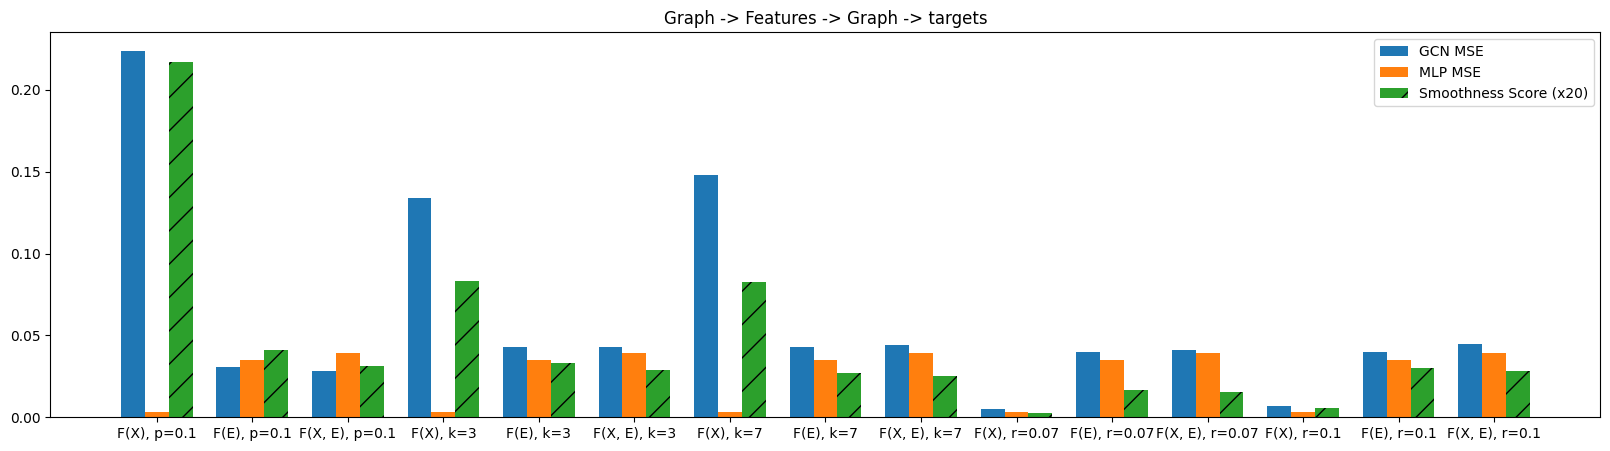

In [207]:
plt.figure(figsize=(20, 5))
performance_gcn = [0.224, 0.031, 0.028, 0.134, 0.043, 0.043, 0.148, 0.043, 0.044, 0.005, 0.040, 0.041, 0.007, 0.040, 0.045]
performance_mlp = [0.003, 0.035, 0.039, 0.003, 0.035, 0.039, 0.003, 0.035, 0.039, 0.003, 0.035, 0.039, 0.003, 0.035, 0.039]
smooth = np.array([4.338, 0.819, 0.628, 1.663, 0.668, 0.581, 1.655, 0.536, 0.499, 0.047, 0.336, 0.308, 0.111, 0.605, 0.560])/20
barWidth = 0.25
br1 = np.arange(len(performance_gcn)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
plt.title("Graph -> Features -> Graph -> targets")
plt.bar(br1, performance_gcn, width=barWidth)
plt.bar(br2, performance_mlp, width=barWidth)
plt.bar(br3, smooth, hatch="/", width=barWidth)
plt.xticks([r + barWidth for r in range(len(performance_gcn))], ['F(X), p=0.1', 'F(E), p=0.1', 'F(X, E), p=0.1', 'F(X), k=3', 'F(E), k=3', 'F(X, E), k=3', 'F(X), k=7', 'F(E), k=7', 'F(X, E), k=7', 'F(X), r=0.07', 'F(E), r=0.07', 'F(X, E), r=0.07', 'F(X), r=0.1', 'F(E), r=0.1', 'F(X, E), r=0.1'])
plt.legend(['GCN MSE', 'MLP MSE', 'Smoothness Score (x20)'])

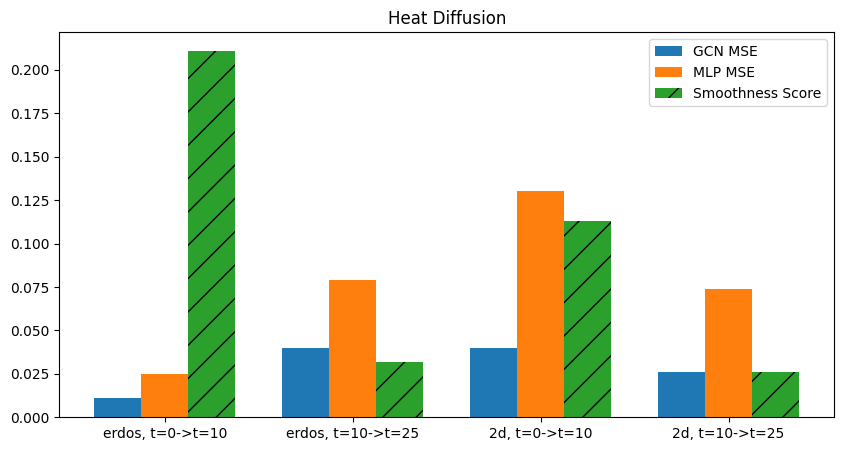

In [212]:
plt.figure(figsize=(10, 5))
performance_gcn = [0.011, 0.040, 0.040, 0.026]
performance_mlp = [0.025, 0.079, 0.130, 0.074]
smooth = np.array([0.211, 0.032, 0.113, 0.026])
barWidth = 0.25
br1 = np.arange(len(performance_gcn)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
plt.title("Heat Diffusion")
plt.bar(br1, performance_gcn, width=barWidth)
plt.bar(br2, performance_mlp, width=barWidth)
plt.bar(br3, smooth, hatch="/", width=barWidth)
plt.xticks([r + barWidth for r in range(len(performance_gcn))], ['erdos, t=0->t=10', 'erdos, t=10->t=25', '2d, t=0->t=10', '2d, t=10->t=25'])
plt.legend(['GCN MSE', 'MLP MSE', 'Smoothness Score'])

In [342]:
n = 100
p = 0.04
G = nx.gnp_random_graph(n, p)

In [371]:
# DATA GEN
N = 100
data_lst = []
for idx in range(N):
    n = 100
    p = 0.04
    G = nx.gnp_random_graph(n, p)
    L = nx.laplacian_matrix(G).todense()
    L = L / np.trace(L) * N
    edges = list(G.edges())
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    
    adj = nx.adjacency_matrix(G)
    G = graphs.Graph(adj)
    G.set_coordinates(kind='spring')
    G.compute_fourier_basis()
    g = filters.Heat(G, [10, 25])
    X = np.zeros(G.N)
    X[50] = 5
    Y = g.filter(X, method='chebyshev')
    X = X.reshape(-1, 1)
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    y_1=Y[:, 0] + 0.1*torch.randn_like(Y[:, 0])
    y_2=Y[:, 1] + 0.1*torch.randn_like(Y[:, 1])
    y_1_smooth = (y_1.T @ L @ y_1) / np.linalg.norm(y_1)
    y_2_smooth = (y_2.T @ L @ y_2) / np.linalg.norm(y_2)
    data = Data(x=X, y_1=Y[:, 0].reshape(-1, 1), y_2=Y[:, 1].reshape(-1, 1), edge_index=torch.concat([edge_index, edge_index.flip(0)], dim=1), y_1_smooth=y_1_smooth, y_2_smooth=y_2_smooth)
    data_lst.append(data)
    #print(y_1_smooth, y_2_smooth)

In [ ]:
import numpy as np
import networkx as nx
from scipy.linalg import eig, pinv
from scipy.stats import multivariate_normal
from scipy.sparse import coo_matrix
from numpy.random import default_rng

rng = default_rng()

In [329]:
A = adj

In [330]:
ub = 2
lb = 0.1
W0 = np.triu(rng.random((N, N)) * (ub - lb) + lb, 1)
W = A * (W0 + W0.T)
L = np.diag(W.sum(axis=1)) - W
L = L / np.trace(L) * N

In [336]:
V, D = eig(L)
sigma = pinv(L)
mu = np.zeros(N)
num_of_signal = 100
gftcoeff = multivariate_normal.rvs(mu, sigma, num_of_signal)
Y = V @ gftcoeff.T
Y_noisy = Y + 0.5*np.random.randn(Y.size)

In [301]:
y = y_1 + 0.5*torch.rand_like(y_1)

In [302]:
(y.T @ L @ y) / np.linalg.norm(y)

tensor(0.5652, dtype=torch.float64)

In [292]:
y_1_smooth

tensor(0.1676, dtype=torch.float64)

In [293]:
y_2_smooth

tensor(0.0152, dtype=torch.float64)

In [ ]:
sm_1 = []
sm_2 = []
for data in data_lst:
    sm_1.append(data.y_1_smooth.item())
    sm_2.append(data.y_2_smooth.item())

In [ ]:
plt.hist(sm_1, alpha=0.7)
plt.hist(sm_2, alpha=0.7)
plt.legend(["smoothness at t=10", "smoothness at t=25"])
plt.title("laplacian smoothness score")

In [ ]:
np.mean(sm_1), np.mean(sm_2)

In [214]:
N = 100
data_lst = []
for idx in range(N):
    n = 100
    points = generate_points(n)
    dist = get_l2_dist(points)*2
    #G = nx.gnp_random_graph(n, p)
    G = nx.from_scipy_sparse_array(kneighbors_graph(points, 5))
    L = nx.laplacian_matrix(G).todense()
    L = L / np.trace(L) * N
    
    edges = list(G.edges())
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    #G = nx.from_scipy_sparse_array(kneighbors_graph(points, 0.07))
    adj = nx.adjacency_matrix(G)
    #adj = dist*torch.tensor(adj.todense()).numpy()
    
    G = graphs.Graph(adj)
    G.coords = points.numpy()
    G.compute_fourier_basis()
    
    g = filters.Heat(G, [10, 25])
    X = np.zeros(G.N)
    X[50] = 5
    Y = g.filter(X, method='chebyshev')
    X = X.reshape(-1, 1)
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    y_1=Y[:, 0]
    y_2=Y[:, 1]
    y_1_smooth = (y_1.T @ L @ y_1) / np.linalg.norm(y_1)
    y_2_smooth = (y_2.T @ L @ y_2) / np.linalg.norm(y_2)
    
    data = Data(x=torch.concat([X, points], dim=1), y_1=Y[:, 0].reshape(-1, 1), y_2=Y[:, 1].reshape(-1, 1), edge_index=torch.concat([edge_index, edge_index.flip(0)], dim=1), y_1_smooth=y_1_smooth, y_2_smooth=y_2_smooth)
    data_lst.append(data)

In [215]:
n = 100
points = generate_points(n)
dist = get_l2_dist(points)*2
#G = nx.gnp_random_graph(n, p)
G = nx.from_scipy_sparse_array(kneighbors_graph(points, 5))
L = nx.laplacian_matrix(G).todense()
L = L / np.trace(L) * N

edges = list(G.edges())
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
#G = nx.from_scipy_sparse_array(kneighbors_graph(points, 0.07))
adj = nx.adjacency_matrix(G)
#adj = dist*torch.tensor(adj.todense()).numpy()

G = graphs.Graph(adj)
G.coords = points.numpy()
G.compute_fourier_basis()

g = filters.Heat(G, [10, 25])
X = np.zeros(G.N)
X[50] = 5
Y = g.filter(X, method='chebyshev')

In [101]:
# DATA GEN CASE 1
N = 100
data_lst_1 = []
data_lst_2 = []
data_lst_3 = []
smooth_lst_1 = []
smooth_lst_2 = []
smooth_lst_3 = []
for idx in range(N):
    n = 100 
    p = 0.1
    X = torch.rand(n, 1)
    Y = torch.sum(X**2 + X, axis=1).reshape(n, 1).float()
    G = nx.gnp_random_graph(n, p)
    L = nx.laplacian_matrix(G).todense()
    L = L / np.trace(L) * N
    
    adj = nx.adjacency_matrix(G)
    edges = list(G.edges())
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_1.append(data)
    smooth_lst_1.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))
    
    Y = []
    for idx in range(len(X)):
        y = 0
        d = 1
        for node_idx in nx.neighbors(G, idx):
            y += torch.sum(X[node_idx]**2 + X[node_idx])
            d += 1
        Y.append(y/d)
    
    Y = torch.tensor(Y).reshape(n, 1)
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_2.append(data)
    smooth_lst_2.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))

    Y = []
    for idx in range(len(X)):
        y = torch.sum((X[idx])**2 + X[idx])
        d = 1
        for node_idx in nx.neighbors(G, idx):
            y += torch.sum(X[node_idx]**2 + X[node_idx])
            d += 1
        Y.append(y/d)

    Y = torch.tensor(Y).reshape(n, 1).float()
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_3.append(data)
    smooth_lst_3.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))

In [149]:
np.mean(smooth_lst_1), np.mean(smooth_lst_2), np.mean(smooth_lst_3)

(0.11135700561312119, 0.604666057582898, 0.559756457523283)

(array([53.,  5.,  5.,  3.,  6.,  3.,  1.,  5., 12.,  7.]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

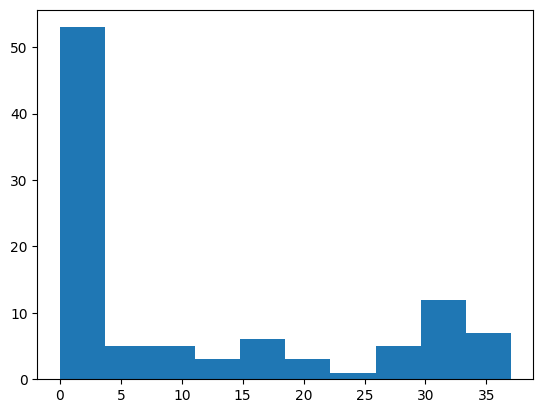

In [158]:
plt.hist(list(dict(nx.degree(G_knn)).values()))

(array([22., 25., 18., 10., 11.,  5.,  5.,  1.,  0.,  3.]),
 array([ 7. ,  8.9, 10.8, 12.7, 14.6, 16.5, 18.4, 20.3, 22.2, 24.1, 26. ]),
 <BarContainer object of 10 artists>)

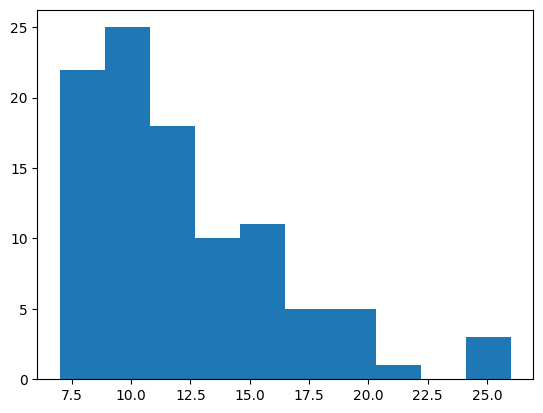

In [160]:
plt.hist(list(dict(nx.degree(G_knn)).values()))

In [138]:
N = 100
G_topo_lst = []
dataset_lst = []
data_lst_1 = []
data_lst_2 = []
data_lst_3 = []

for idx in range(N):
    n = 100 
    p = 0.1
    G = nx.gnp_random_graph(n, p)
    G_topo_lst.append(G)
    # L = nx.laplacian_matrix(G)
    # L = L.todense()
    L = nx.laplacian_matrix(G).todense()
    L = L / np.trace(L) * N
    
    eigval, eigvec = scipy.linalg.eig(L)
    eigvec = eigvec[:, :10]
    X = torch.tensor(eigvec).float()
    Y = torch.sum(X**2 + X, axis=1)
    Y = Y.reshape(n, 1)
    edges = list(G.edges())
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_1.append(data)
    smooth_lst_1.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))
    
    Y = []
    for idx in range(len(X)):
        y = 0
        d = 1
        for node_idx in nx.neighbors(G, idx):
            y += torch.sum(X[node_idx]**2 + X[node_idx])
            d += 1
        Y.append(y/d)

    Y = torch.tensor(Y).reshape(n, 1).float()
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_2.append(data)
    smooth_lst_2.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))

    Y = []
    for idx in range(len(X)):
        y = torch.sum((X[idx])**2 + X[idx])
        d = 1
        for node_idx in nx.neighbors(G, idx):
            y += torch.sum(X[node_idx]**2 + X[node_idx])
            d += 1
        Y.append(y/d)

    Y = torch.tensor(Y).reshape(n, 1).float()
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_3.append(data)
    smooth_lst_3.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))
    
dataset_lst.append(data_lst_1)
dataset_lst.append(data_lst_2)
dataset_lst.append(data_lst_3)

In [159]:
# DATA GEN CASE
N = 100
G_lst = []
#G_topo_lst
smooth_lst_1 = []
smooth_lst_2 = []
smooth_lst_3 = []
#for setting in [('k', 3)]:#, ('k', 7), ('r', 0.07), ('r', 0.1)]:
setting = ('k', 7)
G_type_lst = []
data_lst_1 = []
data_lst_2 = []
data_lst_3 = []
for idx in range(N):
    X = dataset_lst[0][idx].x
    Y = dataset_lst[0][idx].y
    if setting[0] == 'k':
        G_knn = nx.from_scipy_sparse_array(kneighbors_graph(X, setting[1]))
        G_type_lst.append(G_knn)
    else:
        G_knn = nx.from_scipy_sparse_array(radius_neighbors_graph(X, setting[1]))
        G_type_lst.append(G_knn)

    L = nx.laplacian_matrix(G_knn).todense()
    L = L / np.trace(L) * N
    
    edges_knn = list(G_knn.edges())
    edge_index_knn = torch.tensor(edges_knn, dtype=torch.long).t().contiguous()
    data_knn = Data(x=X, y=Y, edge_index=edge_index_knn)
    data_lst_1.append(data_knn)
    smooth_lst_1.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))

    Y = dataset_lst[1][idx].y
    data_knn = Data(x=X, y=Y, edge_index=edge_index_knn)
    data_lst_2.append(data_knn)
    smooth_lst_2.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))

    Y = dataset_lst[2][idx].y
    data_knn = Data(x=X, y=Y, edge_index=edge_index_knn)
    data_lst_3.append(data_knn)
    smooth_lst_3.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))
    
G_lst.append(G_type_lst)
dataset_lst.append(data_lst_1)
dataset_lst.append(data_lst_2)
dataset_lst.append(data_lst_3)

In [235]:
wd_lst = []
for idx in tqdm(range(len(G_lst[0]))):
    G_topo = G_lst[0][idx]
    G_knn = G_lst[3][idx]
    
    degree_sequence_topo = sorted((d for n, d in G_topo.degree()), reverse=True)
    dmean_topo = np.mean(degree_sequence_topo)
    degree_sequence_knn = sorted((d for n, d in G_knn.degree()), reverse=True)
    dmean_knn = np.mean(degree_sequence_knn)
    
    wd = scipy.stats.wasserstein_distance(degree_sequence_topo, degree_sequence_knn)
    wd_lst.append((wd, dmean_topo, dmean_knn))

  0%|          | 0/100 [00:00<?, ?it/s]

(array([ 2.,  0.,  3.,  5., 13., 19., 19., 16., 14.,  9.]),
 array([ 6.94 ,  7.268,  7.596,  7.924,  8.252,  8.58 ,  8.908,  9.236,
         9.564,  9.892, 10.22 ]),
 <BarContainer object of 10 artists>)

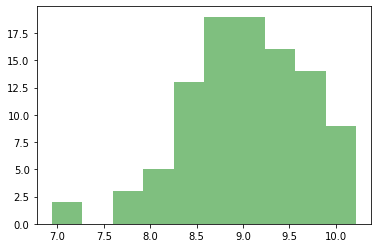

In [236]:
plt.hist([wd_lst[idx][0] for idx in range(len(wd_lst))], alpha=0.5, bins=10, color="green")

Text(0.5, 1.0, 'Graph-Feature-Graph: p=0.1->r=0.07')

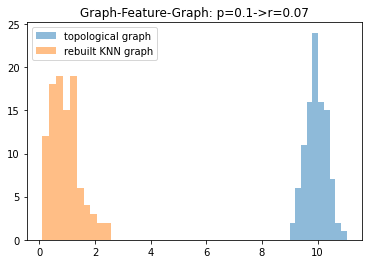

In [238]:
plt.hist([wd_lst[idx][1] for idx in range(len(wd_lst))], alpha=0.5, bins=10)
plt.hist([wd_lst[idx][2] for idx in range(len(wd_lst))], alpha=0.5, bins=10)
plt.legend(['topological graph', 'rebuilt KNN graph'])
plt.title("Graph-Feature-Graph: p=0.1->r=0.07")

In [118]:
# DATA GEN CASE 3
N = 100
#G_lst = []
data_lst_1 = []
data_lst_2 = []
data_lst_3 = []
for idx in range(N):
    n = 100 
    k = 3
    X = torch.rand(100, 10)
    Y = torch.sum(X**2 + X, axis=1)
    Y = Y.reshape(n, 1).float()
    G = nx.from_scipy_sparse_array(kneighbors_graph(X, k))
    L = nx.laplacian_matrix(G).todense()
    L = L / np.trace(L) * N
    #G_lst.append(G)
    smooth_lst_1.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))
    
    edges = list(G.edges())
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_1.append(data)
    
    Y = []
    for idx in range(len(X)):
        y = 0
        d = 1
        for node_idx in nx.neighbors(G, idx):
            y += torch.sum(X[node_idx]**2 + X[node_idx])
            d += 1
        Y.append(y/d)
        
    Y = torch.tensor(Y).reshape(n, 1).float()
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_2.append(data)
    smooth_lst_2.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))
    
    Y = []
    for idx in range(len(X)):
        y = torch.sum((X[idx])**2 + X[idx])
        d = 1
        for node_idx in nx.neighbors(G, idx):
            y += torch.sum(X[node_idx]**2 + X[node_idx])
            d += 1
        Y.append(y/d)
        
    Y = torch.tensor(Y).reshape(n, 1).float()
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_3.append(data)
    smooth_lst_3.append((Y.flatten().numpy().T @ L @ Y.flatten().numpy()) / np.linalg.norm(Y.flatten().numpy()))
    

In [119]:
np.mean(smooth_lst_1), np.mean(smooth_lst_2), np.mean(smooth_lst_3)

(3.8079805796715998, 1.0092405557555417, 0.7301146966291742)

In [268]:
adj_lst = []
for graph in G_lst_topo:
    adj_lst.append(nx.adjacency_matrix(graph))

In [270]:
np.save("gnp_graph_0.1.npy", adj_lst)

In [299]:
# COR
N = 100
case = 2
pearson_lst = []
for idx in range(N):
    n = 100 
    p = 0.1
    X = torch.rand(100, 1)
    G = nx.gnp_random_graph(n, p)
    
    if case == 0:
        Y = X**2 + X
    elif case == 1:
        Y = []
        for idx in range(len(X)):
            y = 0
            for node_idx in nx.neighbors(G, idx):
                y += X[node_idx]**2 + X[node_idx]
            Y.append(y)

        
    else:
        Y = []
        for idx in range(len(X)):
            y = (X[idx])**2 + X[idx]
            for node_idx in nx.neighbors(G, idx):
                y += (X[node_idx])**2 + X[node_idx]
            Y.append(y)
        
    Y = torch.tensor(Y).reshape(n, 1)
    neighbor_lst = []
    
    for idx in range(len(X)):
        neighbor = 0
        for node_idx in nx.neighbors(G, idx):
            neighbor += X[node_idx]
        neighbor_lst.append(neighbor)
        
    edges = list(G.edges())
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    data = Data(x=X, y=Y, edge_index=edge_index)
    
    neighbor_lst = torch.tensor(neighbor_lst)
    
    pearson_lst.append(pearsonr(neighbor_lst.flatten(), data.y.flatten()))

In [300]:
cor = [tp[0] for tp in pearson_lst]
p_val = [tp[1] for tp in pearson_lst]

In [275]:
# Case 2
N = 100
data_lst_2 = []
for idx in range(N):
    n = 100 
    p = 0.05
    X = torch.rand(100, 1)
    G = nx.gnp_random_graph(n, p)
    Y = []
    for idx in range(len(X)):
        y = 0
        for node_idx in nx.neighbors(G, idx):
            y += X[node_idx]**2 + X[node_idx]
        Y.append(y)
        
    Y = torch.tensor(Y).reshape(n, 1)
    edges = list(G.edges())
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_2.append(data)

In [312]:
# COR
N = 100
data_lst_1 = []
data_lst_2 = []
data_lst_3 = []
for idx in range(N):
    n = 100 
    p = 0.05
    X = torch.rand(100, 1)
    Y = X**2 + X
    G = nx.gnp_random_graph(n, p)
    edges = list(G.edges())
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_1.append(data)
    
    Y = []
    for idx in range(len(X)):
        y = 0
        for node_idx in nx.neighbors(G, idx):
            y += X[node_idx]**2 + X[node_idx]
        Y.append(y)
        
    Y = torch.tensor(Y).reshape(n, 1)
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_2.append(data)
    
    Y = []
    for idx in range(len(X)):
        y = (X[idx])**2 + X[idx]
        for node_idx in nx.neighbors(G, idx):
            y += (X[node_idx])**2 + X[node_idx]
        Y.append(y)
        
    Y = torch.tensor(Y).reshape(n, 1)
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_3.append(data)

In [301]:
np.mean(cor), np.mean(p_val)

(0.9750645189589209, 3.1561150869496503e-56)

In [266]:
data = data_lst_1[0]

In [238]:
from scipy.linalg import eigh, pinv
from scipy.stats import multivariate_normal
from scipy.sparse import coo_matrix
from numpy.random import default_rng

In [273]:
# Case 3
N = 100
data_lst_3 = []
for idx in range(N):
    n = 100 
    p = 0.1
    G = nx.gnp_random_graph(n, p)
    L = nx.laplacian_matrix(G).todense()
    L = L / np.trace(L) * n
    V, D = eig(L)
    sigma = pinv(L)
    mu = np.zeros(N)
    num_of_signal = 100
    gftcoeff = multivariate_normal.rvs(mu, sigma, num_of_signal)
    Y = V @ gftcoeff.T
    Y_noisy = Y + 0.5*np.random.randn(Y.size)
    break
    
    Y = []
    for idx in range(len(X)):
        y = 0
        for node_idx in nx.neighbors(G, idx):
            y += (X[idx] + X[node_idx])**2 + (X[idx] + X[node_idx])
        Y.append(y)
        
    Y = torch.tensor(Y).reshape(n, 1)
    edges = list(G.edges())
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    data = Data(x=X, y=Y, edge_index=edge_index)
    data_lst_3.append(data)

In [282]:
(Y.flatten().T @ L @ Y.flatten()) / np.linalg.norm(Y.flatten())

(42.41566485782045+0j)

In [284]:
(Y_noisy.flatten().T @ L @ Y_noisy.flatten()) / np.linalg.norm(Y_noisy.flatten())

(40.960994197455+0j)

In [277]:
layout = nx.spring_layout(G)

/home/zhishang/anaconda3/envs/newpy/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/zhishang/anaconda3/envs/newpy/lib/python3.11/site-packages/matplotlib/axes/_axes.py:4455: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


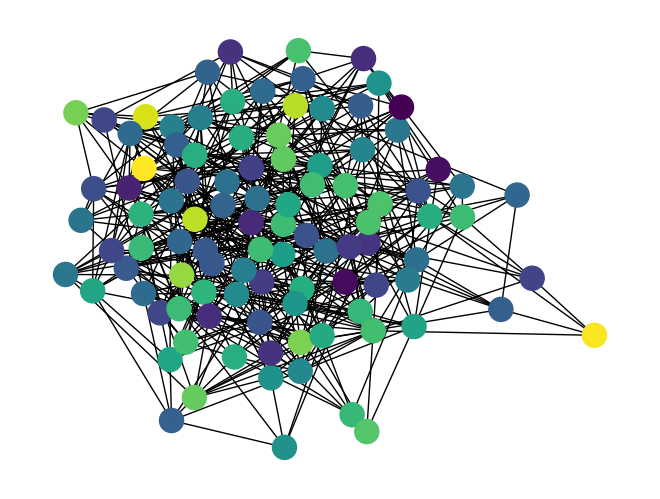

In [278]:
values = Y
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, pos=layout)

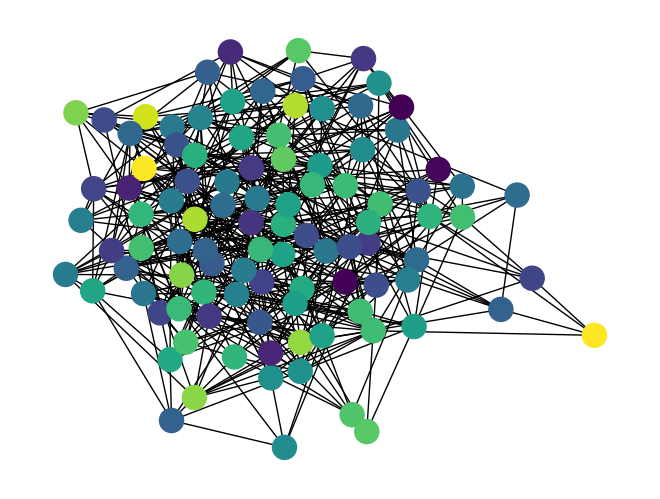

In [279]:
values = Y_noisy
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, pos=layout)

In [348]:
class GNN_1layer(torch.nn.Module):
    def __init__(self):
        super(GNN_1layer, self).__init__()
        self.conv1 = GCNConv(1, 8)  # Input dimension is 1, output dimension is 16
        self.output = nn.Linear(8, 1)   # Output dimension is 1

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)  # Apply ReLU activation function
        x = self.output(x)
        return x

In [349]:
class GNN_2layer(torch.nn.Module):
    def __init__(self):
        super(GNN_2layer, self).__init__()
        self.conv1 = GCNConv(1, 8)  # Input dimension is 1, output dimension is 16
        self.conv2 = GCNConv(8, 8)
        self.output = nn.Linear(8, 1)# Output dimension is 1

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)  
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.output(x)
        return x

In [350]:
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.lin1 = nn.Linear(1, 8)  # Input dimension is 1, output dimension is 16
        self.lin2 = nn.Linear(8, 1)   # Output dimension is 1

    def forward(self, x):
        x = self.lin1(x)
        x = F.relu(x)  # Apply ReLU activation function
        x = self.lin2(x)
        return x

In [351]:
#datasets = [data_lst_1, data_lst_2, data_lst_3]

In [372]:
datasets = [data_lst]

In [375]:
T = 80
setting = "25"
loss_curve_lst = []
index = 0
for dataset in datasets:
    train_range = int(len(dataset)*0.7)
    val_range = int(len(dataset)*0.8)
    
    model1 = GNN_2layer()
    optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)
    loss_curve_gnn1 = []
    loss_curve_gnn2 = []
    loss_curve_mlp = []

    for idx in range(T):
        
        for data in dataset[:train_range]:
            if setting == "25":
                x = data.x
                y = data.y_2
            else:
                x = torch.concat([data.x[:, 1:], data.y_1], dim=1)
                y = data.y_2
            pred = model1(x=x.float(), edge_index=data.edge_index)
            loss = mse_loss(pred.float(), y.float())
            loss.backward()
            optimizer1.step()
            optimizer1.zero_grad()
        
        loss_sum = 0
        for data in dataset[train_range:val_range]:
            if setting == "25":
                x = data.x
                y = data.y_2
            else:
                x = torch.concat([data.x[:, 1:], data.y_1], dim=1)
                y = data.y_2
            pred = model1(x=x.float(), edge_index=data.edge_index)
            loss = mse_loss(pred.float(), y.float())
            loss_sum += loss.item()
        loss_curve_gnn1.append(loss_sum/T)
    
    loss_sum = 0
    for data in dataset[val_range:]:
        if setting == "25":
            x = data.x
            y = data.y_2
        else:
            x = torch.concat([data.x[:, 1:], data.y_1], dim=1)
            y = data.y_2
        pred = model1(x=x.float(), edge_index=data.edge_index)
        loss = mse_loss(pred.float(), y.float())
        loss_sum += loss.item()
    print(loss_sum/T, index+1)
    index += 1
    
    model3 = GNN_1layer()
    optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)
    
    for idx in range(T):
        
        for data in dataset[:train_range]:
            if setting == "25":
                x = data.x
                y = data.y_2
            else:
                x = torch.concat([data.x[:, 1:], data.y_1], dim=1)
                y = data.y_2
            pred = model3(x=x.float(), edge_index=data.edge_index)
            loss = mse_loss(pred.float(), y.float())
            loss.backward()
            optimizer3.step()
            optimizer3.zero_grad()
        
        loss_sum = 0
        for data in dataset[train_range:val_range]:
            if setting == "25":
                x = data.x
                y = data.y_2
            else:
                x = torch.concat([data.x[:, 1:], data.y_1], dim=1)
                y = data.y_2
            pred = model3(x=x.float(), edge_index=data.edge_index)
            loss = mse_loss(pred.float(), y.float())
            loss_sum += loss.item()
        loss_curve_gnn2.append(loss_sum/T)
    
    loss_sum = 0
    for data in dataset[val_range:]:
        if setting == "25":
            x = data.x
            y = data.y_2
        else:
            x = torch.concat([data.x[:, 1:], data.y_1], dim=1)
            y = data.y_2
        pred = model3(x=x.float(), edge_index=data.edge_index)
        loss = mse_loss(pred.float(), y.float())
        loss_sum += loss.item()
    print(loss_sum/T, index+1)
    index += 1
    
    
    model2 = MLP()
    optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)
    
    
    for idx in range(T):
        
        for data in dataset[:train_range]:
            if setting == "25":
                x = data.x
                y = data.y_2
            else:
                x = torch.concat([data.x[:, 1:], data.y_1], dim=1)
                y = data.y_2
            pred = model2(x=x.float())
            loss = mse_loss(pred.float(), y.float())
            loss.backward()
            optimizer2.step()
            optimizer2.zero_grad()
        
        loss_sum = 0
        for data in dataset[train_range:val_range]:
            if setting == "25":
                x = data.x
                y = data.y_2
            else:
                x = torch.concat([data.x[:, 1:], data.y_1], dim=1)
                y = data.y_2
            pred = model2(x=x.float())
            loss = mse_loss(pred.float(), y.float())
            loss_sum += loss.item()
        loss_curve_mlp.append(loss_sum/T)
    
    loss_sum = 0
    for data in dataset[val_range:]:
        if setting == "25":
            x = data.x
            y = data.y_2
        else:
            x = torch.concat([data.x[:, 1:], data.y_1], dim=1)
            y = data.y_2
        pred = model2(x=x.float())
        loss = mse_loss(pred.float(), y.float())
        loss_sum += loss.item()
    print(loss_sum/T, index+1)
    index += 1
    
    loss_curve_lst.append((loss_curve_gnn1, loss_curve_gnn2, loss_curve_mlp))

0.0001124887538026087 1
0.00016471378276037286 2
0.00039267025240405926 3


In [153]:
for data in dataset[val_range:]:
    if setting == "25":
        x = data.x
        y = data.y_2
    else:
        x = data.y_1
        y = data.y_2
    pred = model1(x=x.float(), edge_index=data.edge_index)

In [231]:
np.random.rand()

0.08995029938986265